# Evolving Network of Red Riding Hood

In [1]:
%matplotlib inline

In [2]:
import os
import glob

import numpy as np
import pandas as pd
import powerlaw as pl
import seaborn as sns
import textnet as tn

from sklearn.feature_extraction.text import TfidfVectorizer

from exp_utils import load_rrh

In [3]:
sns.set_style("whitegrid")
flatui = ["#e74c3c", "#34495e", "#3498db", "#9b59b6", "#95a5a6", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))

In [4]:
rrh_files, rrh_dates = load_rrh("/Users/folgert/roodkapje/corpus")

## Vector Space Models

In [5]:
vec_char_idf = TfidfVectorizer(input='filename', use_idf=True, analyzer='char', ngram_range=(4, 4))
X_char_idf = vec_char_idf.fit_transform(rrh_files)
X_char_idf.shape

(427, 36163)

In [6]:
vec_char_tf = TfidfVectorizer(input='filename', use_idf=False, analyzer='char', ngram_range=(4, 4))
X_char_tf = vec_char_tf.fit_transform(rrh_files)
X_char_tf.shape

(427, 36163)

In [7]:
vec_word_idf = TfidfVectorizer(input='filename', use_idf=True, analyzer='word', ngram_range=(1, 1))
X_word_idf = vec_word_idf.fit_transform(rrh_files)
X_word_idf.shape

(427, 10180)

In [8]:
vec_word_tf = TfidfVectorizer(input='filename', use_idf=False, analyzer='word', ngram_range=(1, 1))
X_word_tf = vec_word_tf.fit_transform(rrh_files)
X_word_tf.shape

(427, 10180)

## Clustering

In [9]:
Y_char_idf = tn.bootstrap_neighbors(X_char_idf, time_index=rrh_dates, n_iter=1000, seed=1)
Y_char_tf = tn.bootstrap_neighbors(X_char_tf, time_index=rrh_dates, n_iter=1000, seed=1)
Y_word_idf = tn.bootstrap_neighbors(X_word_idf, time_index=rrh_dates, n_iter=1000, seed=1)
Y_word_tf = tn.bootstrap_neighbors(X_word_tf, time_index=rrh_dates, n_iter=1000, seed=1)

0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 260.645 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 248.055 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 34.731 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 38.488 sec


In [10]:
Y_char_idf_m = tn.bootstrap_neighbors(X_char_idf, time_index=rrh_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)
Y_char_tf_m = tn.bootstrap_neighbors(X_char_tf, time_index=rrh_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)
Y_word_idf_m = tn.bootstrap_neighbors(X_word_idf, time_index=rrh_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)
Y_word_tf_m = tn.bootstrap_neighbors(X_word_tf, time_index=rrh_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)

0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 254.928 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 244.560 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 36.945 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 39.913 sec


## Analysis

### Sigma Evaluation

In [11]:
S_char_idf = tn.statistics.eval_sigmas(Y_char_idf, rrh_dates)
S_char_tf = tn.statistics.eval_sigmas(Y_char_tf, rrh_dates)
S_word_idf = tn.statistics.eval_sigmas(Y_word_idf, rrh_dates)
S_word_tf = tn.statistics.eval_sigmas(Y_word_tf, rrh_dates)

S_char_idf_m = tn.statistics.eval_sigmas(Y_char_idf_m, rrh_dates)
S_char_tf_m = tn.statistics.eval_sigmas(Y_char_tf_m, rrh_dates)
S_word_idf_m = tn.statistics.eval_sigmas(Y_word_idf_m, rrh_dates)
S_word_tf_m = tn.statistics.eval_sigmas(Y_word_tf_m, rrh_dates)

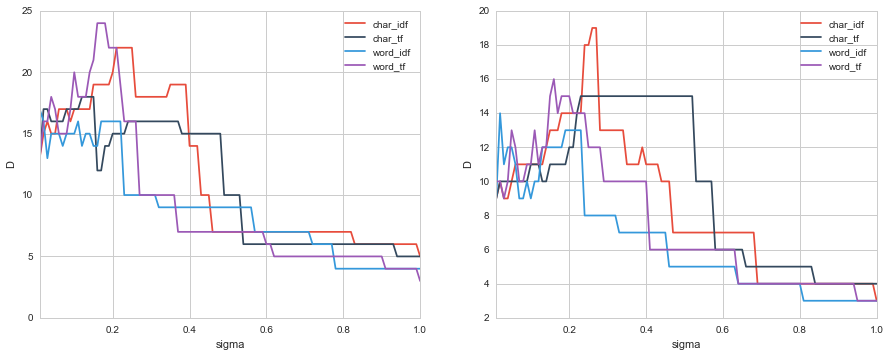

In [12]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2)

S_char_idf.D.plot(label="char_idf", ax=ax1)
S_char_tf.D.plot(label="char_tf", ax=ax1)
S_word_idf.D.plot(label="word_idf", ax=ax1)
S_word_tf.D.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("D")

S_char_idf_m.D.plot(label="char_idf", ax=ax2)
S_char_tf_m.D.plot(label="char_tf", ax=ax2)
S_word_idf_m.D.plot(label="word_idf", ax=ax2)
S_word_tf_m.D.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("D")

fig.set_figwidth(15)

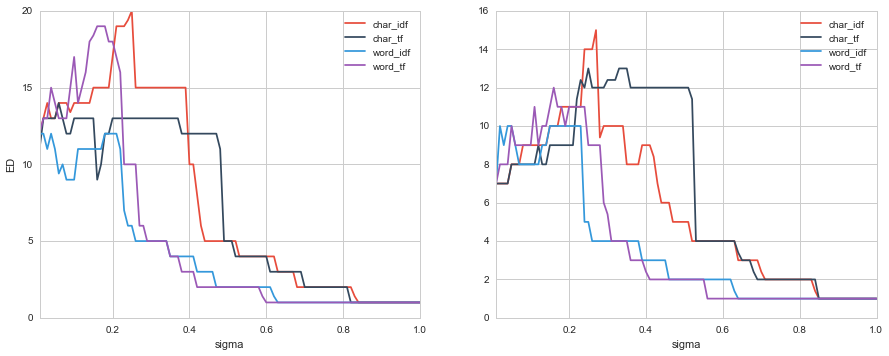

In [13]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2)

S_char_idf.ED.plot(label="char_idf", ax=ax1)
S_char_tf.ED.plot(label="char_tf", ax=ax1)
S_word_idf.ED.plot(label="word_idf", ax=ax1)
S_word_tf.ED.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("ED")

S_char_idf_m.ED.plot(label="char_idf", ax=ax2)
S_char_tf_m.ED.plot(label="char_tf", ax=ax2)
S_word_idf_m.ED.plot(label="word_idf", ax=ax2)
S_word_tf_m.ED.plot(label="word_tf", ax=ax2)
ax2.legend()
ax1.set_ylabel("ED")

fig.set_figwidth(15)

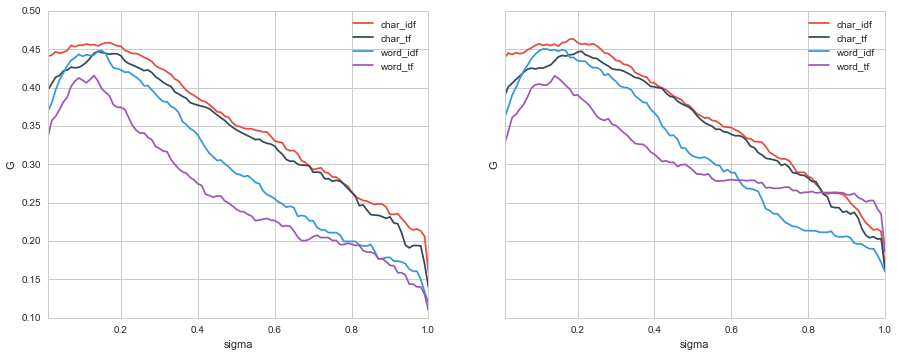

In [14]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.gini_d.plot(label="char_idf", ax=ax1)
S_char_tf.gini_d.plot(label="char_tf", ax=ax1)
S_word_idf.gini_d.plot(label="word_idf", ax=ax1)
S_word_tf.gini_d.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

S_char_idf_m.gini_d.plot(label="char_idf", ax=ax2)
S_char_tf_m.gini_d.plot(label="char_tf", ax=ax2)
S_word_idf_m.gini_d.plot(label="word_idf", ax=ax2)
S_word_tf_m.gini_d.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

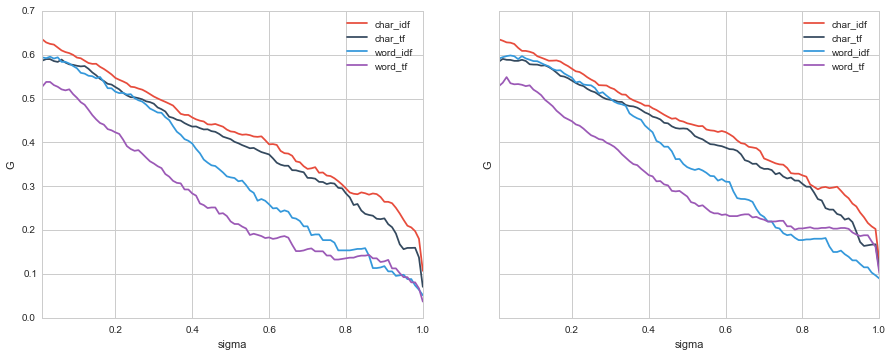

In [15]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.gini_d_in.plot(label="char_idf", ax=ax1)
S_char_tf.gini_d_in.plot(label="char_tf", ax=ax1)
S_word_idf.gini_d_in.plot(label="word_idf", ax=ax1)
S_word_tf.gini_d_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

S_char_idf_m.gini_d_in.plot(label="char_idf", ax=ax2)
S_char_tf_m.gini_d_in.plot(label="char_tf", ax=ax2)
S_word_idf_m.gini_d_in.plot(label="word_idf", ax=ax2)
S_word_tf_m.gini_d_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

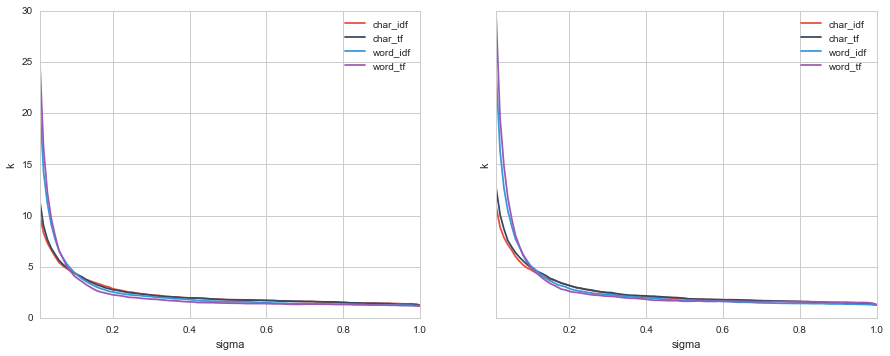

In [16]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.k.plot(label="char_idf", ax=ax1)
S_char_tf.k.plot(label="char_tf", ax=ax1)
S_word_idf.k.plot(label="word_idf", ax=ax1)
S_word_tf.k.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k")

S_char_idf_m.k.plot(label="char_idf", ax=ax2)
S_char_tf_m.k.plot(label="char_tf", ax=ax2)
S_word_idf_m.k.plot(label="word_idf", ax=ax2)
S_word_tf_m.k.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k")

fig.set_figwidth(15)

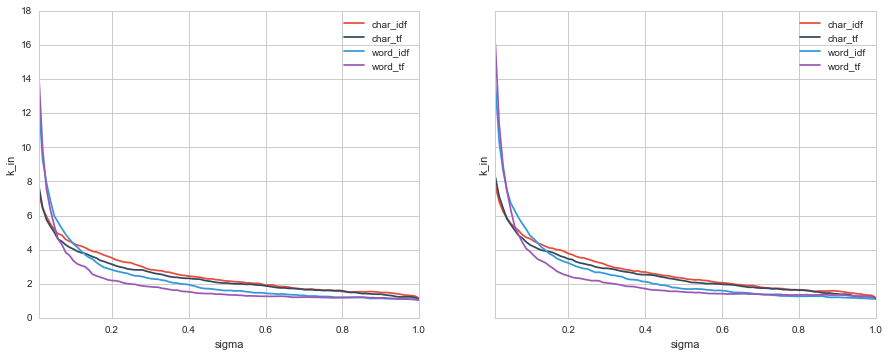

In [17]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.k_in.plot(label="char_idf", ax=ax1)
S_char_tf.k_in.plot(label="char_tf", ax=ax1)
S_word_idf.k_in.plot(label="word_idf", ax=ax1)
S_word_tf.k_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k_in")

S_char_idf_m.k_in.plot(label="char_idf", ax=ax2)
S_char_tf_m.k_in.plot(label="char_tf", ax=ax2)
S_word_idf_m.k_in.plot(label="word_idf", ax=ax2)
S_word_tf_m.k_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k_in")

fig.set_figwidth(15)

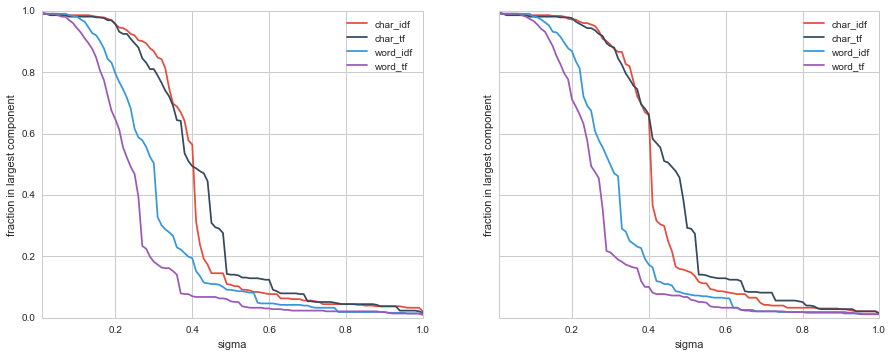

In [18]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.comp_f.plot(label="char_idf", ax=ax1)
S_char_tf.comp_f.plot(label="char_tf", ax=ax1)
S_word_idf.comp_f.plot(label="word_idf", ax=ax1)
S_word_tf.comp_f.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("fraction in largest component")

S_char_idf_m.comp_f.plot(label="char_idf", ax=ax2)
S_char_tf_m.comp_f.plot(label="char_tf", ax=ax2)
S_word_idf_m.comp_f.plot(label="word_idf", ax=ax2)
S_word_tf_m.comp_f.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("fraction in largest component")

fig.set_figwidth(15)

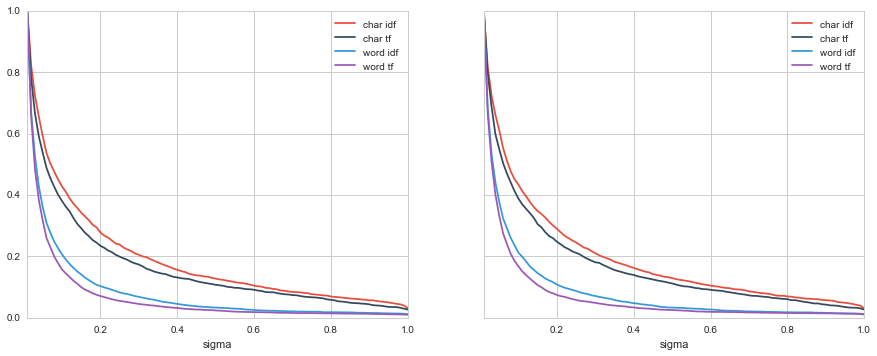

In [19]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

(S_char_idf.m / S_char_idf.m.max()).plot(label="char idf", ax=ax1)
(S_char_tf.m / S_char_tf.m.max()).plot(label="char tf", ax=ax1)
(S_word_idf.m / S_word_idf.m.max()).plot(label="word idf", ax=ax1)
(S_word_tf.m / S_word_tf.m.max()).plot(label="word tf", ax=ax1)
ax1.legend()

(S_char_idf_m.m / S_char_idf_m.m.max()).plot(label="char idf", ax=ax2)
(S_char_tf_m.m / S_char_tf_m.m.max()).plot(label="char tf", ax=ax2)
(S_word_idf_m.m / S_word_idf_m.m.max()).plot(label="word idf", ax=ax2)
(S_word_tf_m.m / S_word_tf_m.m.max()).plot(label="word tf", ax=ax2)
ax2.legend()

fig.set_figwidth(15)

### Evolving Graphs Statistics

In [20]:
gr = lambda x: x.year

E_char_idf = tn.statistics.evolving_graph_statistics(Y_char_idf, rrh_dates, groupby=gr, sigma=0.3)
E_char_tf = tn.statistics.evolving_graph_statistics(Y_char_tf, rrh_dates, groupby=gr, sigma=0.3)
E_word_idf = tn.statistics.evolving_graph_statistics(Y_word_idf, rrh_dates, groupby=gr, sigma=0.3)
E_word_tf = tn.statistics.evolving_graph_statistics(Y_word_tf, rrh_dates, groupby=gr, sigma=0.3)

E_char_idf_m = tn.statistics.evolving_graph_statistics(Y_char_idf_m, rrh_dates, groupby=gr, sigma=0.3)
E_char_tf_m = tn.statistics.evolving_graph_statistics(Y_char_tf_m, rrh_dates, groupby=gr, sigma=0.3)
E_word_idf_m = tn.statistics.evolving_graph_statistics(Y_word_idf_m, rrh_dates, groupby=gr, sigma=0.3)
E_word_tf_m = tn.statistics.evolving_graph_statistics(Y_word_tf_m, rrh_dates, groupby=gr, sigma=0.3)

/Users/folgert/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


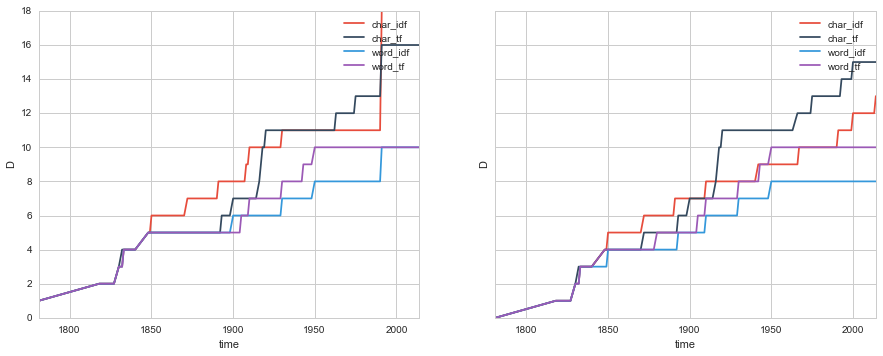

In [21]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.D.plot(label="char_idf", ax=ax1)
E_char_tf.D.plot(label="char_tf", ax=ax1)
E_word_idf.D.plot(label="word_idf", ax=ax1)
E_word_tf.D.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("D")

E_char_idf_m.D.plot(label="char_idf", ax=ax2)
E_char_tf_m.D.plot(label="char_tf", ax=ax2)
E_word_idf_m.D.plot(label="word_idf", ax=ax2)
E_word_tf_m.D.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("D")

fig.set_figwidth(15)

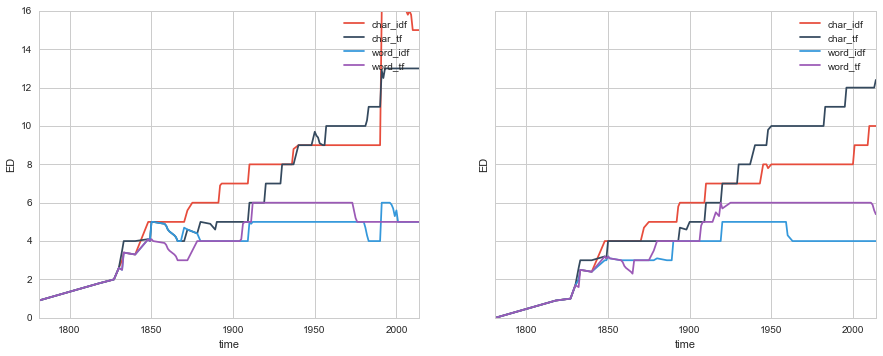

In [22]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.ED.plot(label="char_idf", ax=ax1)
E_char_tf.ED.plot(label="char_tf", ax=ax1)
E_word_idf.ED.plot(label="word_idf", ax=ax1)
E_word_tf.ED.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("ED")

E_char_idf_m.ED.plot(label="char_idf", ax=ax2)
E_char_tf_m.ED.plot(label="char_tf", ax=ax2)
E_word_idf_m.ED.plot(label="word_idf", ax=ax2)
E_word_tf_m.ED.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("ED")

fig.set_figwidth(15)

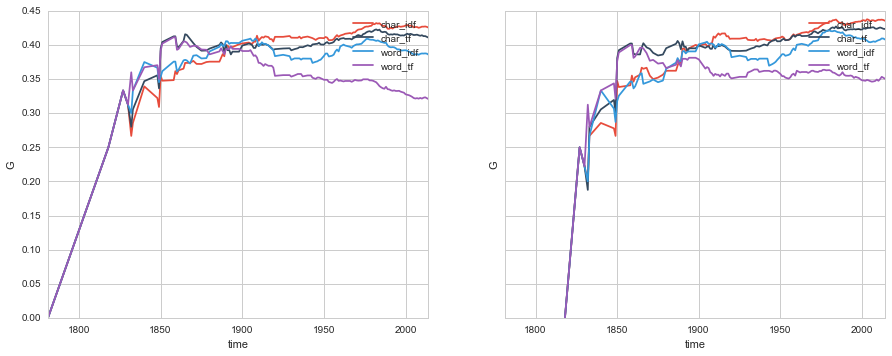

In [23]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.gini_d.plot(label="char_idf", ax=ax1)
E_char_tf.gini_d.plot(label="char_tf", ax=ax1)
E_word_idf.gini_d.plot(label="word_idf", ax=ax1)
E_word_tf.gini_d.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

E_char_idf_m.gini_d.plot(label="char_idf", ax=ax2)
E_char_tf_m.gini_d.plot(label="char_tf", ax=ax2)
E_word_idf_m.gini_d.plot(label="word_idf", ax=ax2)
E_word_tf_m.gini_d.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

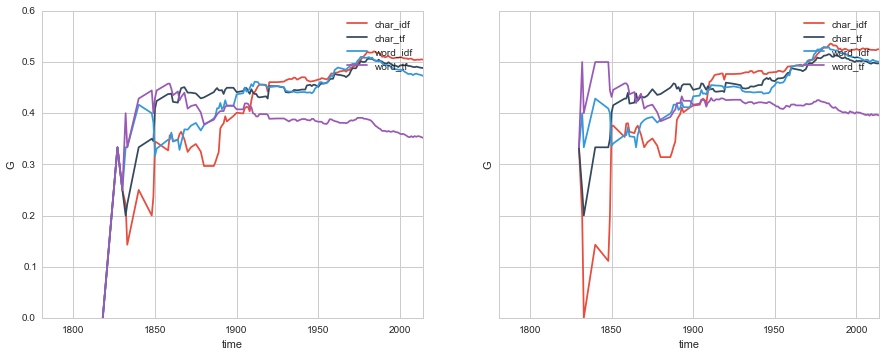

In [24]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.gini_d_in.plot(label="char_idf", ax=ax1)
E_char_tf.gini_d_in.plot(label="char_tf", ax=ax1)
E_word_idf.gini_d_in.plot(label="word_idf", ax=ax1)
E_word_tf.gini_d_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

E_char_idf_m.gini_d_in.plot(label="char_idf", ax=ax2)
E_char_tf_m.gini_d_in.plot(label="char_tf", ax=ax2)
E_word_idf_m.gini_d_in.plot(label="word_idf", ax=ax2)
E_word_tf_m.gini_d_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

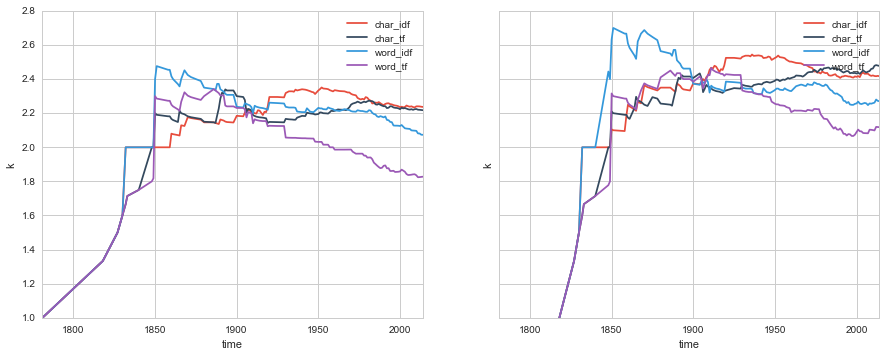

In [25]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.k.plot(label="char_idf", ax=ax1)
E_char_tf.k.plot(label="char_tf", ax=ax1)
E_word_idf.k.plot(label="word_idf", ax=ax1)
E_word_tf.k.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k")

E_char_idf_m.k.plot(label="char_idf", ax=ax2)
E_char_tf_m.k.plot(label="char_tf", ax=ax2)
E_word_idf_m.k.plot(label="word_idf", ax=ax2)
E_word_tf_m.k.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k")

fig.set_figwidth(15)

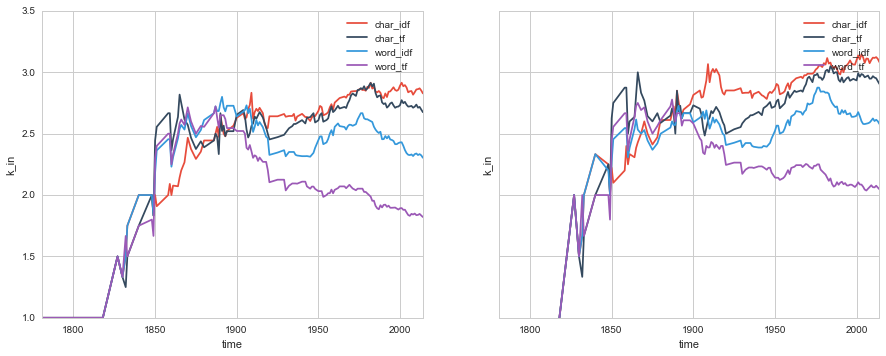

In [26]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.k_in.plot(label="char_idf", ax=ax1)
E_char_tf.k_in.plot(label="char_tf", ax=ax1)
E_word_idf.k_in.plot(label="word_idf", ax=ax1)
E_word_tf.k_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k_in")

E_char_idf_m.k_in.plot(label="char_idf", ax=ax2)
E_char_tf_m.k_in.plot(label="char_tf", ax=ax2)
E_word_idf_m.k_in.plot(label="word_idf", ax=ax2)
E_word_tf_m.k_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k_in")

fig.set_figwidth(15)

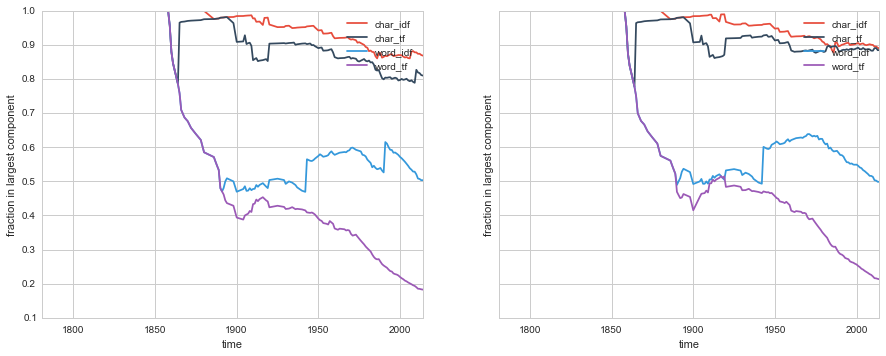

In [27]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.comp_f.plot(label="char_idf", ax=ax1)
E_char_tf.comp_f.plot(label="char_tf", ax=ax1)
E_word_idf.comp_f.plot(label="word_idf", ax=ax1)
E_word_tf.comp_f.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("fraction in largest component")

E_char_idf_m.comp_f.plot(label="char_idf", ax=ax2)
E_char_tf_m.comp_f.plot(label="char_tf", ax=ax2)
E_word_idf_m.comp_f.plot(label="word_idf", ax=ax2)
E_word_tf_m.comp_f.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("fraction in largest component")

fig.set_figwidth(15)

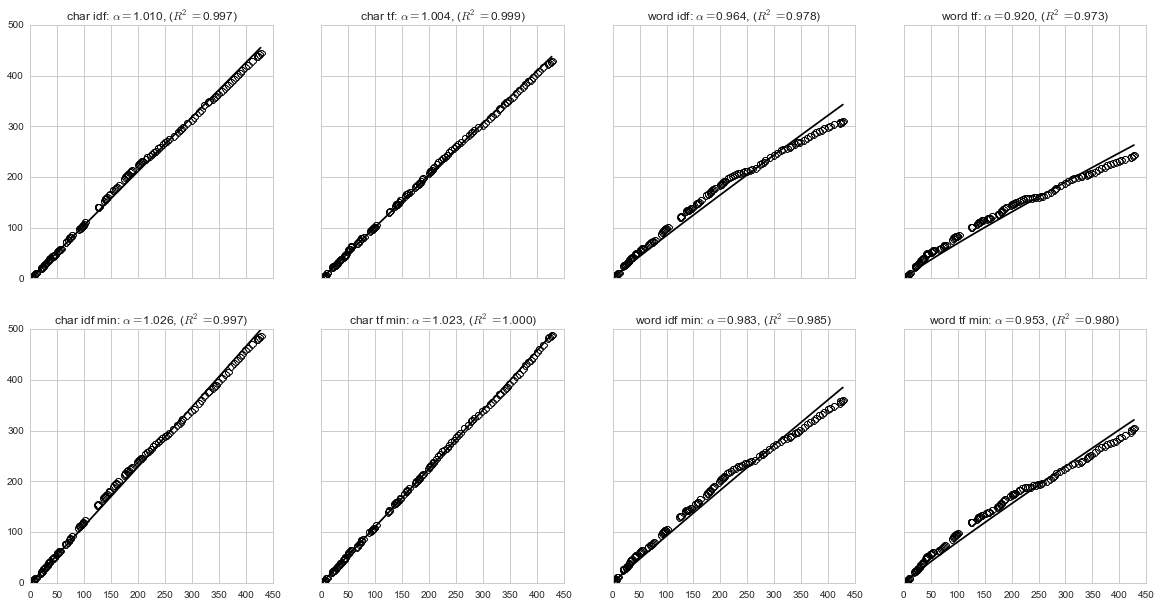

In [28]:
fig, ((a1, a2, a3, a4), (a5, a6, a7, a8)) = sns.plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)

R, alpha = tn.statistics.fit_densification(E_char_idf, ax=a1)
a1.set_title(r"char idf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_char_tf, ax=a2)
a2.set_title(r"char tf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_idf, ax=a3)
a3.set_title(r"word idf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_tf, ax=a4)
a4.set_title(r"word tf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))

R, alpha = tn.statistics.fit_densification(E_char_idf_m, ax=a5)
a5.set_title(r"char idf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_char_tf_m, ax=a6)
a6.set_title(r"char tf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_idf_m, ax=a7)
a7.set_title(r"word idf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_tf_m, ax=a8)
a8.set_title(r"word tf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))

fig.set_figwidth(20)
fig.set_figheight(10)

### Degree Distribution Analysis

In [29]:
def compare_dists(fit, dists=['power_law', 'lognormal', 'exponential']):
    combinations = [(dists[i], dists[i + 1]) for i in range(len(dists) - 1)]
    comparisons = [fit.distribution_compare(d1, d2) for d1, d2 in combinations]
    results = []
    for i, (ll, p_value) in enumerate(comparisons):
        winner, loser = (1, 0) if ll < 0 else (0, 1)
        winner, loser = combinations[i][winner], combinations[i][loser]
        yield "%s > %s (p=%.3f)" % (winner, loser, p_value)

In [30]:
models = [('char_idf', Y_char_idf), 
          ('char_tf', Y_char_tf), 
          ('word_idf', Y_word_idf),
          ('word_tf', Y_word_tf), 
          ('char_idf_m', Y_char_idf_m), 
          ('char_tf_m', Y_char_tf_m), 
          ('word_idf_m', Y_word_idf_m),
          ('word_tf_m', Y_word_tf_m)]

#### In-Degree

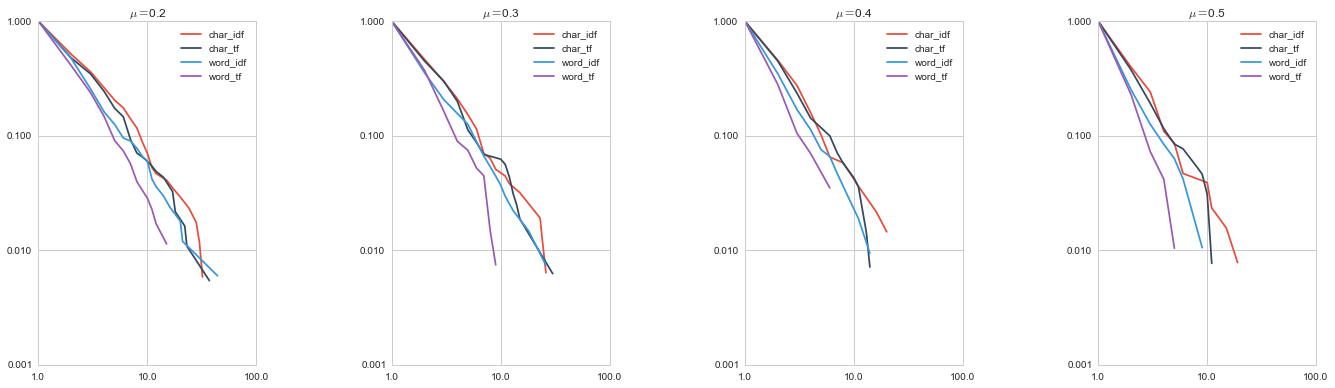

In [31]:
from matplotlib.ticker import ScalarFormatter

fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[:4]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.in_degree().values() if v > 0)
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

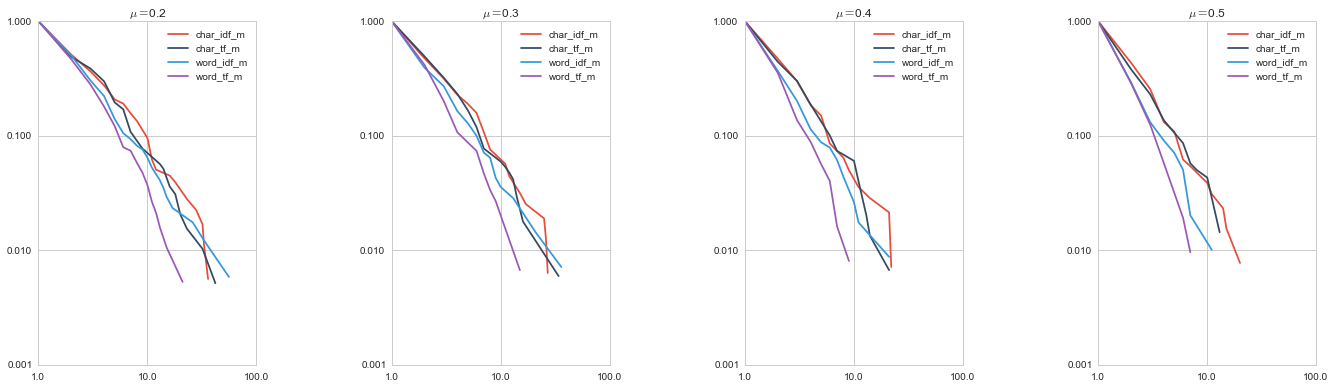

In [32]:
from matplotlib.ticker import ScalarFormatter

fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[4:]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.in_degree().values() if v > 0) # include unconnected nodes or not?
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

In [33]:
fits = []
for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v + 1 for v in G.in_degree().values())    
        fit = pl.Fit(degree_in, discrete=True)
        fits.append({'model': model, 'sigma': sigma, 
                     'x_min': fit.xmin, 'alpha': fit.alpha, 
                     'comparisons': ' '.join(compare_dists(fit))})
fit_df = pd.DataFrame(fits)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [34]:
fit_df

,alpha,comparisons,model,sigma,x_min
0,2.241509,lognormal > power_law (p=0.138) lognormal > ex...,char_idf,0.2,2
1,2.330045,lognormal > power_law (p=0.188) lognormal > ex...,char_tf,0.2,2
2,2.629267,lognormal > power_law (p=0.753) lognormal > ex...,word_idf,0.2,3
3,3.049005,lognormal > power_law (p=0.395) lognormal > ex...,word_tf,0.2,4
4,2.210247,lognormal > power_law (p=0.163) lognormal > ex...,char_idf_m,0.2,2
5,2.254432,lognormal > power_law (p=0.116) lognormal > ex...,char_tf_m,0.2,2
6,2.488775,lognormal > power_law (p=0.719) lognormal > ex...,word_idf_m,0.2,3
7,2.926345,lognormal > power_law (p=0.362) lognormal > ex...,word_tf_m,0.2,4
8,2.421335,lognormal > power_law (p=0.304) lognormal > ex...,char_idf,0.3,2
9,2.466408,lognormal > power_law (p=0.290) lognormal > ex...,char_tf,0.3,2


#### Degree

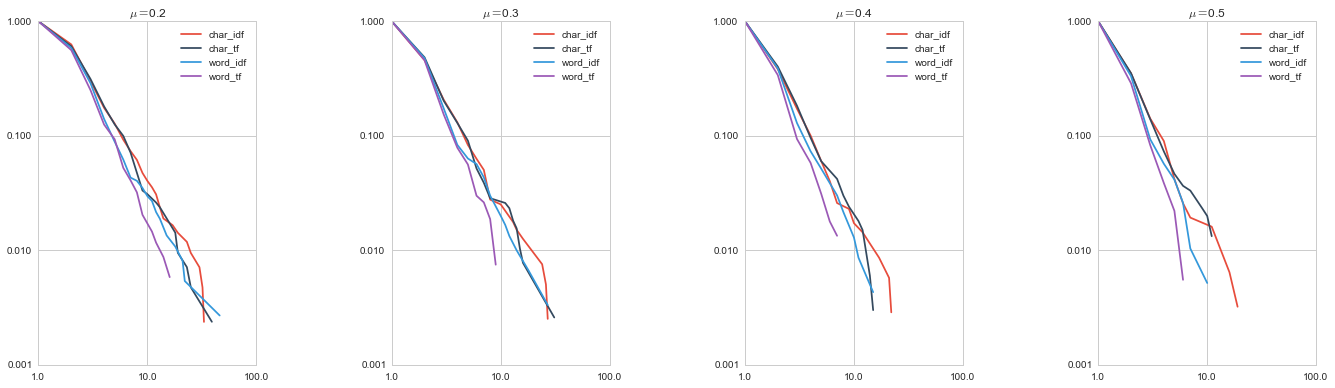

In [35]:
from matplotlib.ticker import ScalarFormatter

fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[:4]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.degree().values() if v > 0)
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

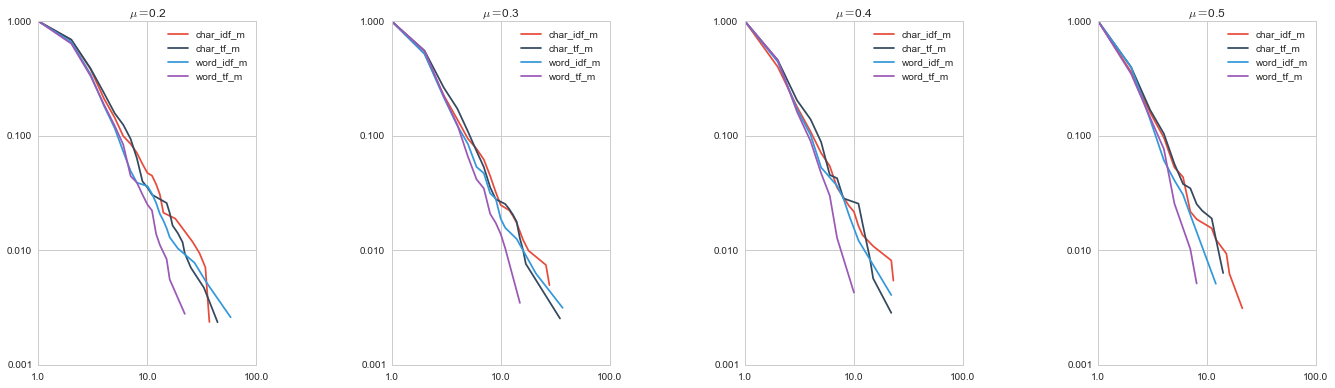

In [36]:
from matplotlib.ticker import ScalarFormatter

fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[4:]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.degree().values() if v > 0) # include unconnected nodes or not?
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

In [37]:
fits = []
for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.degree().values() if v > 0)    
        fit = pl.Fit(degree_in, discrete=True)
        fits.append({'model': model, 'sigma': sigma, 
                     'x_min': fit.xmin, 'alpha': fit.alpha, 
                     'comparisons': ' '.join(compare_dists(fit))})
fit_df = pd.DataFrame(fits)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [38]:
fit_df

,alpha,comparisons,model,sigma,x_min
0,2.512318,lognormal > power_law (p=0.401) lognormal > ex...,char_idf,0.2,3
1,2.606352,lognormal > power_law (p=0.394) lognormal > ex...,char_tf,0.2,3
2,2.698921,lognormal > power_law (p=0.782) lognormal > ex...,word_idf,0.2,4
3,2.910911,lognormal > power_law (p=0.313) lognormal > ex...,word_tf,0.2,3
4,2.543910,lognormal > power_law (p=0.455) lognormal > ex...,char_idf_m,0.2,4
5,2.570602,lognormal > power_law (p=0.324) lognormal > ex...,char_tf_m,0.2,3
6,2.790905,lognormal > power_law (p=0.261) lognormal > ex...,word_idf_m,0.2,3
7,2.834428,lognormal > power_law (p=0.205) lognormal > ex...,word_tf_m,0.2,3
8,2.472088,lognormal > power_law (p=0.327) lognormal > ex...,char_idf,0.3,2
9,2.561677,lognormal > power_law (p=0.291) lognormal > ex...,char_tf,0.3,3
